# Computer session 1

## Basics in Python

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Exercice 2.16

Consider the matrix $A$ defined as: 
$$\begin{pmatrix}4&6&-2&3\\2&-1&0&1\\-7&0&1&12\end{pmatrix}.$$

1. Define $A$ as a `numpy.array`.

In [3]:
A = np.array([[4,6,-2,3],[2,-1,0,1],[-7,0,1,12]])

2. Print the first line and the second column of $A$.

In [4]:
print(A[:,0])

[ 4  2 -7]


3. Create a new matrix `Ac` as a copy of $A$. Modify it by multiplying the first two
   lines by 2 and (then) divide its last column by 3. 

In [5]:
Ac = np.copy(A).astype(float)
Ac[0:-1,] = Ac[0:-1,] * 2
Ac[:,-1] = Ac[:,-1] / 3
Ac

array([[ 8.        , 12.        , -4.        ,  2.        ],
       [ 4.        , -2.        ,  0.        ,  0.66666667],
       [-7.        ,  0.        ,  1.        ,  4.        ]])

4. Define the new matrix $B$
   $$\begin{pmatrix}4&5&6\\5&10&15\\1&1&1\end{pmatrix}.$$

In [6]:
B = np.array([[4,5,6],[5,10,15],[1,1,1]])

5. Go back to the initial matrix $A$. Create a matrix $C\in M_{33}(\mathbb{R})$
   as a sub-matrix of $A$ defined by $1\leq i,j\leq 3, c_{ij}=a_{ij}$.

In [7]:
C = np.copy(A[:,:-1])
C

array([[ 4,  6, -2],
       [ 2, -1,  0],
       [-7,  0,  1]])

6. Matrix product:
   - Create $D = BA$ (using `numpy.dot`).
   - Create $E = B\cdot C$ where $\cdot$ denotes the Hadamard product of
     matrices : $$\forall 1\leq i,j\leq 3,\quad e_{ij}=c_{ij}b_{ij}.$$ 

In [8]:
D = np.dot(B,A)
E = C[:,:] * B[:,:]

7. Compute the sum of all elements of $E$, and create the vector
   $Y\in\mathbb{R}^3$ whose coordinates are given, for $1\leq i \leq 3$, by
   $y_i=\sum_{j=1}^{4}d_{ij}$.

In [9]:
print(np.sum(E))
Y = np.sum(D,axis=1)
Y

28


array([ 90, 165,  19])

## Plotting curves

The basic command for plotting curves is `plot(x,y)`. In this expression, `x`
et `y` are (`numpy.array`) with the same size which can be either declared or generated.
You should use `numpy.linspace(a,b,N)` to represent as a list the interval $(a, b)$ with $N$
(uniform) discretisation points.

The functions `title`, `axis`, `legend`, `x/ylabel` are useful for the presentation
of the graphs. The typical code will write as follows:

```{python}
def f(x) : 
    return .... # The function

xx = linspace (a ,b , N) #
plot( xx , f(xx) , 'color') # 'color' is optional but allows to choose the color of the curve
axis('equal') # the two axis are at the same scale
title("Graph")
legend ("f")
xlabel("\$ x\$-axis")
ylabel("\$y\$-axis")
```

### Exercice 2.17

1. Plot the graph of $f:x\mapsto x^2 \cos(10x)$ on $(-\pi;\pi)$ in green.

Text(0, 0.5, 'f(x)')

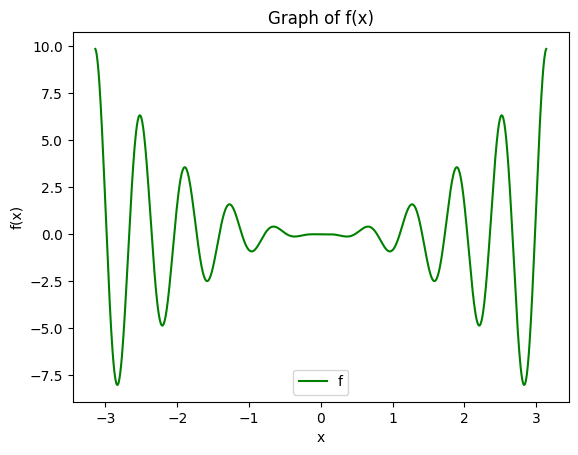

In [10]:
def f(x):
    return(np.power(x,2)*np.cos(10*x))

xx = np.linspace(-np.pi,np.pi,1000)
plt.plot(xx,f(xx),'g')
plt.title("Graph of f(x)")
plt.legend("f")
plt.xlabel("x")
plt.ylabel("f(x)")

2. Plot, on the same graph, the functions $f_n : x\mapsto x^2 \cos(nx)$ pour $x\in
(−\pi, \pi)$ for $n = 0, 1, \dots , 10$. Observe that if we create a graph using
`plt.plot(xx,f(xx),...)`, we can call back the function `plt.plot(xx,g(xx),....)`
to draw another graph on the same figure.

Text(0, 0.5, 'f(x)')

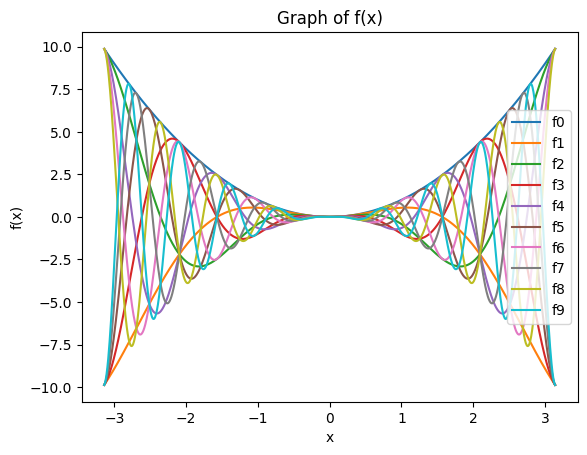

In [11]:
def fn(x,n):
    return(np.power(x,2)*np.cos(n*x))

for n in range(0,10):
    plt.plot(xx,fn(xx,n),label = f"f{n}")

plt.title("Graph of f(x)")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")

Finally, the `numpy.contour` function is extremely useful to plot level-sets of functions
of several variables. To do so, we consider a function $f$ of two variables and we
generate an array containing all the values of $f$ as follows: once $f$ and the two
domains of definition are give, we can write:

```{python}
z =[[f(x,y) for x in ...] for y in ..]
```

The function fonction `plt.contour(x domain,y domain,Z,N)` plots `N` level sets.
The `plt.colorbar()` command allows for a tuning of the colour scheme.


### Exercise 2.18

Plot 20 level sets of
$$f : (x, y) \mapsto e^{−x^2} \sin(\pi x − y)$$
for $(x, y) \in (−4, 4)^2$. Toy around with the options `cmap='inferno'`,
`cmap='plasma'`...


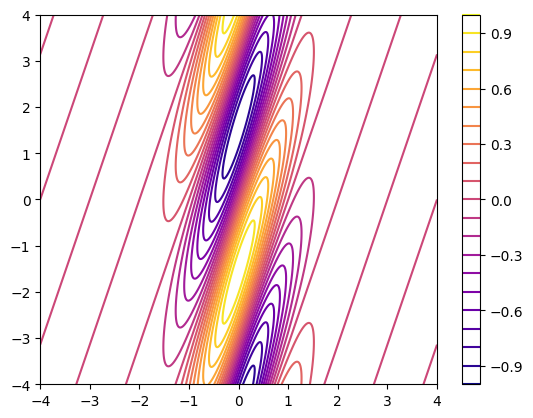

In [12]:
def f1(x,y):
    return(np.exp(-np.power(x,2)) * np.sin(np.pi*x - y))

Z = [[f1(x,y) for x in np.linspace(-4,4,1000)] for y in np.linspace(-4,4,1000)]

plt.contour(np.linspace(-4,4,1000),np.linspace(-4,4,1000),Z,20,cmap = 'plasma')
plt.colorbar()

## Basics of gradient descent

### Exercise 2.19

1. We first consider the minimisation problem
   $$\inf_{x\in\mathbb{R}^d}\frac12\left\langle Ax, x\right\rangle − \left\langle b, x\right\rangle.$$
   
   We work in dimension 2. Write a python function $f$ that takes as arguments $A$, $b$
   and $x$ and returns $\frac12\left\langle Ax, x\right\rangle − \left\langle b, x\right\rangle.$

In [13]:
def f(A,b,x):
    return(1/2 * np.dot(np.dot(A,x),x) - np.dot(b,x))

2. Choose any symmetric, positive definite matrix $A$ and generate a random vector $b$. Solve the equation
    $$Ax = b$$
    using the gradient descent method (you are of course allowed to use, here,
    the explicit expression for the gradient). Can you illustrate the order of
    convergence of your method?

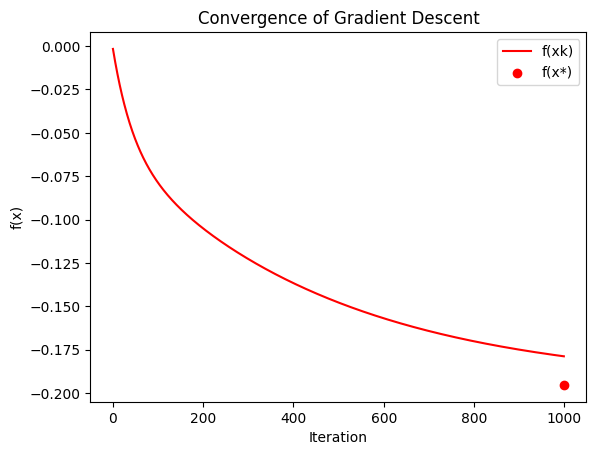

C:\Users\Antonin\AppData\Local\Temp\ipykernel_15712\3704122234.py:29: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(norm_x))


Text(0.5, 1.0, 'Convergence of Gradient Descent')

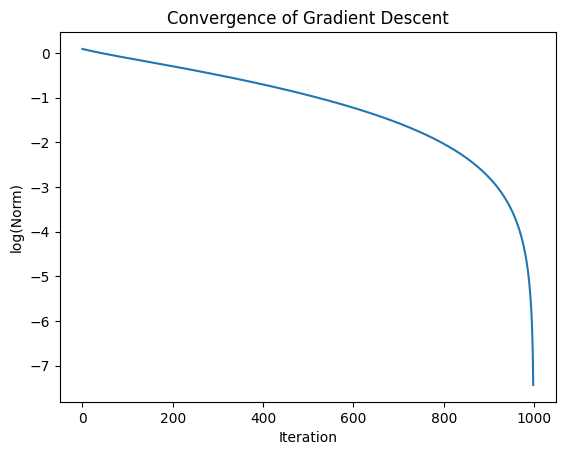

In [111]:
np.random.seed(500)

d = 2
M = np.random.rand(d,d)
A = np.dot(M,M.T)
b = np.random.rand(d)

tau = 0.01
x0 = np.zeros(d)
x_star = np.linalg.solve(A,b)
n_iter = np.arange(1000)

xk = []
for _ in n_iter:
    x0 = x0 - tau * (np.dot(A,x0) - b)
    xk.append(x0)

list_x = np.array(xk)
norm_x = np.linalg.norm(list_x - list_x[-1],axis=1)

plt.plot([f(A,b,x) for x in list_x],'r',label = "f(xk)")
plt.scatter(n_iter[-1],f(A,b,x_star),c = 'r',label = "f(x*)")
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("f(x)")
plt.title("Convergence of Gradient Descent")
plt.show()

plt.plot(np.log(norm_x))
plt.xlabel("Iteration")
plt.ylabel("log(Norm)")
plt.title("Convergence of Gradient Descent")

3. Plot the level sets of the function $f$, and represent the successive iterates
   on the graph.

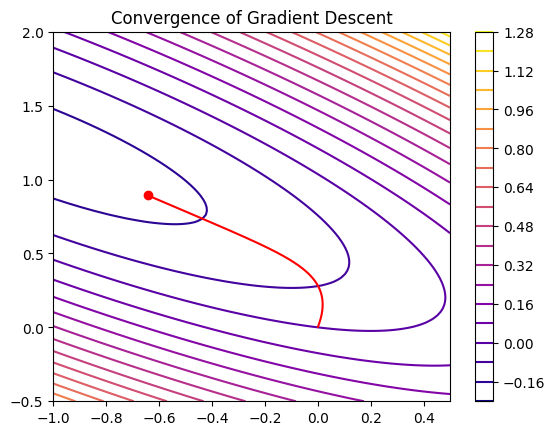

In [ ]:
# Generate grid for contour plot
x = np.linspace(-1,0.5,100)
y = np.linspace(-0.5,2,100)
X,Y = np.meshgrid(x,y)
Z = np.zeros_like(X)

# Compute f(x) for each x in grid
for i in range(100):
    for j in range(100):
        Z[i,j] = f(A,b,np.array([X[i,j],Y[i,j]]))

# Plot level set of f(x)
plt.contour(X,Y,Z,20,cmap = 'plasma')
plt.colorbar()
plt.plot(list_x[:,0],list_x[:,1],'r')
plt.scatter(list_x[-1,0],list_x[-1,1],c = 'r')
plt.title("Convergence of Gradient Descent")
plt.show()

## Exercice 2.20

We now consider a function $f$ of $d$ variables.

1. We aim at approximation, numerically, the gradient of a function $f$. In order to do
    so, we resort to a centred difference methods. In other words, we write:

    $$\dfrac{\partial f}{\partial e_i}\simeq \frac{f(x+\delta e_i)-f(x-\delta
    e_i)}{2\delta}$$
    for $\delta>0$ small enought where $\{e_i\}_{i=1,\dots,d}$ is the canonical
    basis of $\mathbb{R}^d$. First define the vectors $e_i$ in Python. Second,
    write a function `gradient(F,x,d,delta=1e-05)` that returns the discrete
    gradient of the Python function `F`. You can test your code on the following
    toy function:

In [64]:
# Test function
def F(x):
    return x[0]**2 + x[1]**2

# vector ei
def e(d,i):
    return(np.eye(d)[i-1].T)

# Gradient of F
def gradient(F,x,d,delta=1e-5):
    return np.array([(F(x + delta * e(d,i)) - F(x - delta * e(d,i)))/(2*delta) for i in range(1,d+1)])

for d in range(2,6):
    x = np.random.rand(d)
    print(f"Gradient of F at x is {gradient(F,x,d)}")

Gradient of F at x is [1.08918242 1.38138074]
Gradient of F at x is [1.66167615 1.27181862 0.        ]
Gradient of F at x is [1.90751666 1.13990875 0.         0.        ]
Gradient of F at x is [1.49825351 1.71613687 0.         0.         0.        ]


2. Write a code that takes, as arguments, $x_0$ and a step size $\tau$ and returns the
    sequence generated by the gradient descent initialised at $x_0$ with fixed step
    size $\tau$. Test your code on `F`.

In [128]:
def gradient_descent(F,x0,d,tau=1e-3,n_iter=1000):
    x = x0
    xk = []
    for _ in range(n_iter):
        x -= tau * gradient(F,x,d)
        xk.append(x)
    return np.array(xk)

np.random.seed(10)
for d in range(2,6):
    x0 = np.random.rand(d)
    xk = gradient_descent(F,x0,d)
    print(f"Gradient descent in dim {d} of F is {F(xk[-1]).item()}")

Gradient descent in dim 2 of F is 0.010860922985331175
Gradient descent in dim 3 of F is 0.017553177876327618
Gradient descent in dim 4 of F is 0.0016374844215302088
Gradient descent in dim 5 of F is 0.008711159439748558


We now apply this to the least square problem to test our algorithm: fix
$\alpha_0 =3$, $\alpha_1 = 2$, an integer $N$ and generate a random vector of
size $N$ by calling `Xi=numpy.random.rand(N)*2-1` (this generates numbers between $-1$
and $1$). Generate a “noise” vector `Wi=numpy.random.rand(N)*2-1`. Finally, set
`Yi=alpha0+alpha1*Xi+Wi` (the set of noisy observations we have access to). We
want to see whether we can recover the values of $\alpha_0$ and $\alpha_1$ from
the knowledge of `(Xi, Yi)`. To do so, we define, for an array $A = (a_0 ,
a_1 )$,

$E(A)=\frac{1}{N}\sum_{k=1}^{N}|y_i-(a_0+a_1 x_i)|^2$.

In [129]:
# Parameters
alpha_0 = 3
alpha_1 = 2
N = 1000

# Vectors 
X = np.random.rand(N)*2-1
W = np.random.rand(N)*2-1
Y = alpha_0 + alpha_1*X + W

3. Write the function $A \mapsto E(A)$ in python, $A$ being coded as an `numpy`
   array. The vectors `Xi` and `Yi` are `numpy` array defined globally. 

In [130]:
def E(A,Xi,Yi):
    return np.mean(np.abs(Yi - (A[0] - A[1]*Xi))**2)

4. Plot 20 level lines of $E$. Is what you observe coherent with we might expect?

5. Minimise $E$ with a constant step-size gradient descent using the discretised
   gradient you computed earlier. Run your code with several values of $\tau$
   and find the best value for $\tau$. 

6. Check that we find a good approximation for $(\alpha_0,\alpha_1)$. Show datas
   `(Xi,Yi)` and the line $y=a_0+a_1x$ that you obtain, for $x\in[-1,1]$.